## Load the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import json


In [2]:
file_name = 'kaggle-train-billigence.csv'
try:
    sheet = pd.read_csv(file_name,header=0, index_col='PassengerId',encoding='utf-8') # key is PassengerId
except FileNotFoundError:
    print('The csv file %s has not been found.' %file_name)

In [7]:
sheet

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Description of the columns, explore each feature on their own

In [27]:
# column headers listing
print("column headers listing")
print(sheet.columns)
print("\n")

# information about data frane shape
print("information about data frane shape")
print('The number of data rows is:',sheet.shape[0])
print('The number of columns without the key "PassengerId" is:',sheet.shape[1])
print("\n")

# column name listing
print("column name listing")
print(sheet.columns[1])
print("\n")

# column values listing
print("column values listing")
print(sheet['Sex'])
print("\n")

# distinct values in column listing
print("distinct values in column listing")
print(sheet['Sex'].unique())
print("\n")

# row values listing
print("row values listing - function iloc")
print(sheet.iloc[0]) # iloc assignes the index as usual - from 0 to the number of rows minus 1
print("\n")

print("row values listing - function loc")
print(sheet.loc[1]) # loc assignes the index due the "key index" of the rows (in this case PassengerId) 
print("\n")

column headers listing
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


information about data frane shape
The number of data rows is: 891
The number of columns without the key "PassengerId" is: 11


column name listing
Pclass


column values listing
PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object


distinct values in column listing
['male' 'female']


row values listing - function iloc
Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Emb

In [9]:
sheet.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Look into missing or corrupted values (could we, and should we fill them in somehow?)

In [10]:
#overview of dataset
sheet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [12]:
check_nan = sheet[sheet["Age"].isnull()]
check_nan

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [28]:
check_minus_ticket_price = sheet[sheet["Fare"] <=0]

print("Number of zero or negative values:",check_minus_ticket_price.shape[0])
print("\n")

check_zero_ticket_price = sheet[sheet["Fare"] == 0]
check_zero_ticket_price

Number of zero or negative values: 15




,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


## Statistical overview (i.e. how many children were there?)

In [36]:
# sub-df children
children = sheet[sheet["Age"] <=18]
##print(children)
children_avg_age = round(children["Age"].mean(),2)

# sub-df women
women = sheet[(sheet["Sex"] == 'female') & ((sheet["Age"] > 18) | (sheet["Age"].isnull()))]
##print(women)
women_avg_age = round(women["Age"].mean(),2)

# sub-df men
men = sheet[(sheet["Sex"] == 'male') & ((sheet["Age"] > 18) | (sheet["Age"].isnull()))]
##print(men)
men_avg_age = round(men["Age"].mean(),2)

youngest = sheet[sheet ["Age"] == sheet["Age"].min()]
youngest_month = round(youngest["Age"].min()*12)
##print(youngest)
oldest = sheet[sheet ["Age"] == sheet["Age"].max()]

def survived_or_not(a):
    if a == 1:
        return ("survived")
    else: return ("didn't survive")

#print(survived_or_not(youngest.iloc[0]["Survived"]))


print("Our dataset statistical overview:")
print("Note: This statistical overview doesn't have to be complete - we don't have age information from all passengers! And our dataset is incomplete - on the Titanic board were 2208 people - according to wikipedia.com (https://en.wikipedia.org/wiki/Passengers_of_the_Titanic)")
print("\n")

stat_over = {
    "People": ["Children", "Women", "Men", "Total"],
    "# on the board": [
                              children.shape[0]
                            , women.shape[0]
                            , men.shape[0]
                            , sheet.shape[0]
                            ],
    "Survived": [
                   children["Survived"].sum()
                 , women["Survived"].sum()
                 , men["Survived"].sum()
                 ,sheet["Survived"].sum()
                ],
    "% of survivors": 
                                 [round(children["Survived"].sum()/children.shape[0]*100,2)
                                , round(women["Survived"].sum()/women.shape[0]*100,2)
                                , round(men["Survived"].sum()/men.shape[0]*100,2)
                                , round(sheet["Survived"].sum()/sheet.shape[0]*100,2)
                                 ],
    "Average age": [
                      round(children_avg_age,2)
                    , round(women_avg_age,2)
                    , round(men_avg_age,2)
                    , round(sheet["Age"].mean(),2)
                    ]
}

statiscitacal_overview = pd.DataFrame(stat_over)


Our dataset statistical overview:
Note: This statistical overview doesn't have to be complete - we don't have age information from all passengers! And our dataset is incomplete - on the Titanic board were 2208 people - according to wikipedia.com (https://en.wikipedia.org/wiki/Passengers_of_the_Titanic)




In [41]:
# print the table with statistical overview:
statiscitacal_overview

,People,# on the board,Survived,% of survivors,Average age
0,Children,139,70,50.36,10.72
1,Women,246,187,76.02,33.91
2,Men,506,85,16.80,34.48
3,Total,891,342,38.38,29.70


In [40]:
## who were the oldest and youngest persons on the board
print("The youngest person was", youngest.iloc[0]["Name"],"and was only", youngest_month, "months old and",survived_or_not(youngest.iloc[0]["Survived"]))
print("The oldest person was", oldest.iloc[0]["Name"],"and was", round(oldest.iloc[0]["Age"]), "years old and",survived_or_not(oldest.iloc[0]["Survived"]))
print("\n")

The youngest person was Thomas, Master. Assad Alexander and was only 5 months old and survived
The oldest person was Barkworth, Mr. Algernon Henry Wilson and was 80 years old and survived




In [42]:

print("The average ticket price was: £", round(sheet["Fare"].mean(),2))
ticket_1_cl = sheet[sheet["Pclass"] == 1]
#print(ticket_1_cl)
ticket_2_cl = sheet[sheet["Pclass"] == 2]
#print(ticket_2_cl)
ticket_3_cl = sheet[sheet["Pclass"] == 3]
#print(ticket_3_cl)



ticket = {
    "Class":["first","second","third"],
    "Average ticket price":[
                                  ticket_1_cl["Fare"].mean()
                                , ticket_2_cl["Fare"].mean()
                                , ticket_3_cl["Fare"].mean()
                            ],
    "# of sold tickets": [
                                  ticket_1_cl.shape[0]
                                , ticket_2_cl.shape[0]
                                , ticket_3_cl.shape[0]
                                ],
    "Survived":[
                      ticket_1_cl["Survived"].sum()
                    , ticket_2_cl["Survived"].sum()
                    , ticket_3_cl["Survived"].sum()
               ]
}
ticket_df = pd.DataFrame(ticket)
#print(ticket_df)

ticket_df["% of survivors"] = round(ticket_df["Survived"]/ticket_df["# of sold tickets"]*100,2)

ticket_df

The average ticket price was: £ 32.2


,Class,Average ticket price,# of sold tickets,Survived,% of survivors
0,first,84.154687,216,136,62.96
1,second,20.662183,184,87,47.28
2,third,13.675550,491,119,24.24


## Visualization of the data (try different types of plots)

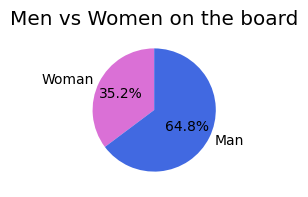

In [44]:
women_perc = round(sheet[sheet["Sex"] =='female'].shape[0]/sheet.shape[0]*100,2)
#print(women_perc)
men_perc = round(sheet[sheet["Sex"] =='male'].shape[0]/sheet.shape[0]*100,2)
#print(men_perc)

plt.figure(figsize=(20,2))

y = [women_perc,men_perc]
mylabels = ["Woman", "Man"]
mycolors = ["orchid", "royalblue"]

plt.pie(y, labels = mylabels, startangle = 90, colors = mycolors, autopct='%1.1f%%')
#plt.legend()
plt.ylabel('')
plt.title('Men vs Women on the board')
plt.show()

[0 1 2]


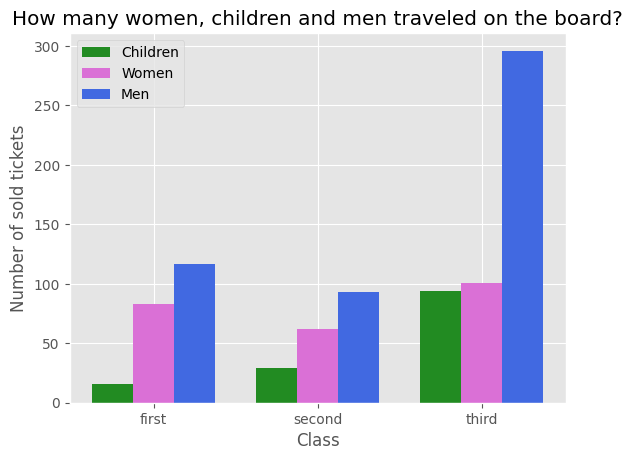

In [45]:
##print(ticket_df["Number of sold tickets"])
##print(women[women["Pclass"] == 1].shape[0])

### help: https://www.youtube.com/watch?v=nKxLfUrkLE8

##plot
plt.style.use ('ggplot')
x_axis = ticket_df["Class"]
# hack for three bars in one X value (it means: for first class I get three bars)
x_indexes = np.arange(len(x_axis))
width = 0.25

print(x_indexes)

y_child = [children[children["Pclass"] == 1].shape[0], children[children["Pclass"] == 2].shape[0],children[children["Pclass"] == 3].shape[0]]

y_women = [women[women["Pclass"] == 1].shape[0], women[women["Pclass"] == 2].shape[0],women[women["Pclass"] == 3].shape[0]]

y_men =  [men[men["Pclass"] == 1].shape[0], men[men["Pclass"] == 2].shape[0],men[men["Pclass"] == 3].shape[0]]


plt.bar(x_indexes - width,y_child, width = width, label="Children",color='forestgreen')
plt.bar(x_indexes,y_women, width = width,label="Women",color='orchid')
plt.bar(x_indexes + width,y_men, width = width,label="Men",color='royalblue')

plt.legend()
plt.xticks(ticks= x_indexes,labels=x_axis) ## secure the x_label will be name of the classes
plt.xlabel('Class')
plt.ylabel('Number of sold tickets')
plt.title('How many women, children and men traveled on the board?')
plt.show()

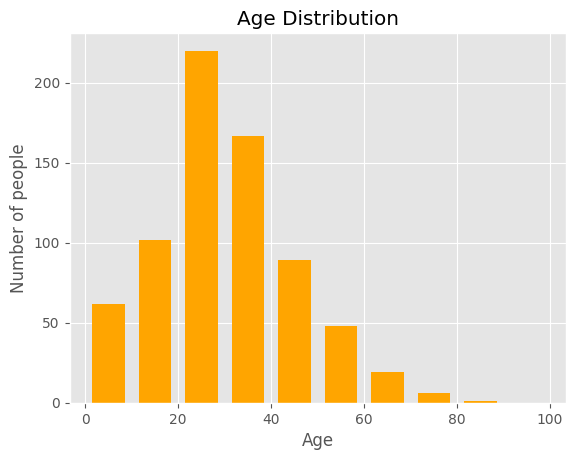

In [46]:
##plot
plt.style.use ('ggplot')
population_age = sheet["Age"]
bins = [0,10,20,30,40,50,60,70,80,90, 100]

plt.hist(population_age, bins, histtype='bar', color= 'orange', rwidth=0.7)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age Distribution')
plt.show()

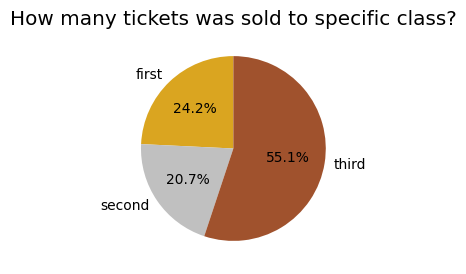

In [47]:
plt.figure(figsize=(20,3))

y = ticket_df["# of sold tickets"]
mylabels = ticket_df["Class"]
mycolors = ["goldenrod", "silver", "sienna"]

plt.pie(y, labels = mylabels, startangle = 90, colors = mycolors,autopct='%1.1f%%')
#plt.legend()
plt.ylabel('')
plt.title('How many tickets was sold to specific class?')
plt.show()

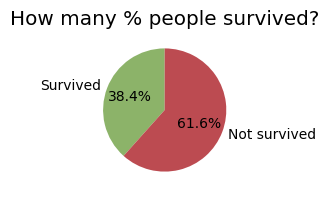

In [49]:
survi_perc = round(sheet["Survived"].sum()/sheet.shape[0]*100,2)
#print(survi_perc)
not_survi_perc = 100 - survi_perc
#print(not_survi_perc)

##plot
plt.figure(figsize=(20,2))

y = [survi_perc,not_survi_perc]
mylabels = ["Survived", "Not survived"]
mycolors = ["#8cb369", "#bc4b51"]

plt.pie(y, labels = mylabels, startangle = 90, colors = mycolors, autopct='%1.1f%%')
#plt.legend()
plt.ylabel('')
plt.title('How many % people survived?')
plt.show()


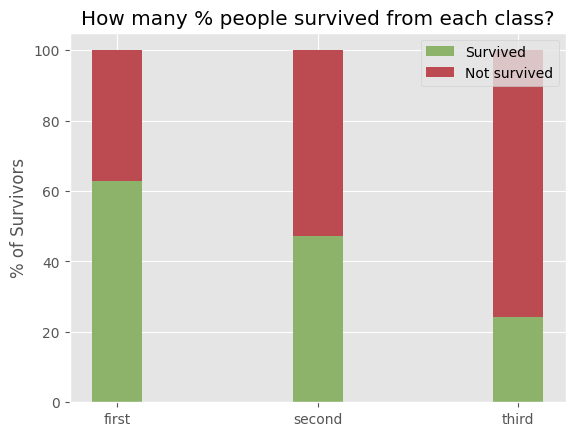

In [53]:
cl_1_survi_df = ticket_1_cl[ticket_1_cl["Survived"] == 1]
cl_1_survi = round(cl_1_survi_df.shape[0]/ticket_1_cl.shape[0]*100,2)
cl_1_not_survi = 100 - cl_1_survi
#print(cl_1_survi,cl_1_not_survi)

cl_2_survi_df = ticket_2_cl[ticket_2_cl["Survived"] == 1]
cl_2_survi = round(cl_2_survi_df.shape[0]/ticket_2_cl.shape[0]*100,2)
cl_2_not_survi = 100 - cl_2_survi
#print(cl_2_survi,cl_2_not_survi)

cl_3_survi_df = ticket_3_cl[ticket_3_cl["Survived"] == 1]
cl_3_survi = round(cl_3_survi_df.shape[0]/ticket_3_cl.shape[0]*100,2)
cl_3_not_survi = 100 - cl_3_survi
#print(cl_3_survi,cl_3_not_survi)

cl_survi_perc = [cl_1_survi,cl_2_survi,cl_3_survi]
cl_not_survi_perc = [cl_1_not_survi,cl_2_not_survi,cl_3_not_survi]

##plot
plt.style.use ('ggplot')
x_axis = ticket_df["Class"]
# hack for three bars in one X value (it means: for first class I get three bars)
x_indexes = np.arange(len(x_axis))
width = 0.25

#print(x_indexes)

plt.bar(x_indexes,cl_survi_perc, width = width, label="Survived",color='#8cb369')
plt.bar(x_indexes, cl_not_survi_perc, bottom= cl_survi_perc, width = width, label="Not survived",color='#bc4b51')


plt.legend()
plt.xticks(ticks= x_indexes,labels=x_axis) ## secure the x_label will be name of the classes
plt.xlabel('')
plt.ylabel('% of Survivors')
plt.title('How many % people survived from each class?')
plt.show()

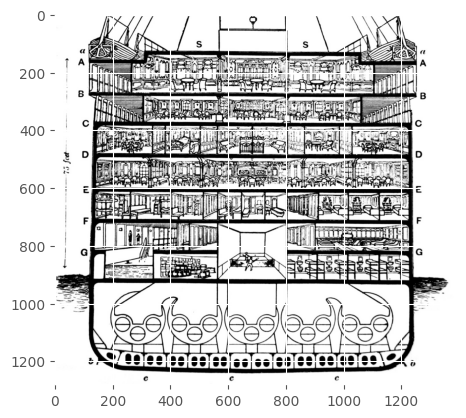

In [24]:
# reading png image file
im = plt.imread('Olympic_Titanic_cutaway_diagram2.JPG')
  
# show image cross section view of the Titanic
plt.imshow(im)

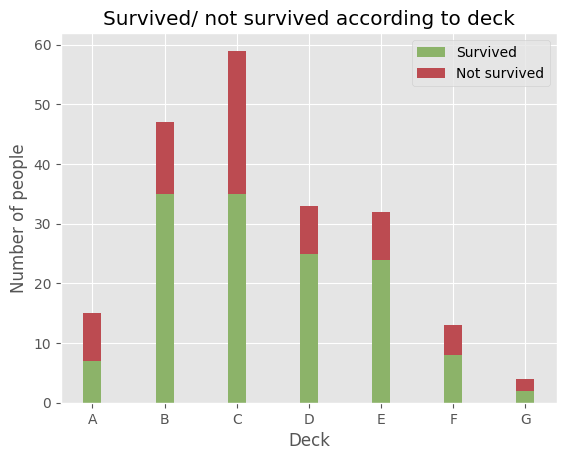

In [54]:
cabins = sheet[sheet["Cabin"].notnull()]
#print(cabins)

A_cabin = cabins.loc[cabins["Cabin"].str.contains("^A\s*")]
B_cabin = cabins.loc[cabins["Cabin"].str.contains("^B\s*")]
C_cabin = cabins.loc[cabins["Cabin"].str.contains("^C\s*")]
D_cabin = cabins.loc[cabins["Cabin"].str.contains("^D\s*")]
E_cabin = cabins.loc[cabins["Cabin"].str.contains("^E\s*")]
F_cabin = cabins.loc[cabins["Cabin"].str.contains("^F\s*")]
G_cabin = cabins.loc[cabins["Cabin"].str.contains("^G\s*")]
#print(A_cabin)
#print(sheet.info())
#print(A_cabin.shape[0])
#print(B_cabin.shape[0])
#print(C_cabin.shape[0])
#print(D_cabin.shape[0])
#print(E_cabin.shape[0])# -1
#print(F_cabin.shape[0])
#print(G_cabin.shape[0])# -3
#print(A_cabin.shape[0] + B_cabin.shape[0]+ C_cabin.shape[0]+ D_cabin.shape[0]+ E_cabin.shape[0]+ F_cabin.shape[0]+ G_cabin.shape[0])

##plot
plt.style.use ('ggplot')
x_axis = ["A","B","C","D","E","F","G"]
# hack for three bars in one X value (it means: for first class I get three bars)
x_indexes = np.arange(len(x_axis))
width = 0.25

#print(x_indexes)

y_survived = [  A_cabin[A_cabin["Survived"] == 1].shape[0]
              , B_cabin[B_cabin["Survived"] == 1].shape[0]
              , C_cabin[C_cabin["Survived"] == 1].shape[0]
              , D_cabin[D_cabin["Survived"] == 1].shape[0]
              , E_cabin[E_cabin["Survived"] == 1].shape[0]
              , F_cabin[F_cabin["Survived"] == 1].shape[0]
              , G_cabin[G_cabin["Survived"] == 1].shape[0]
              
             ]
y_victims = [  A_cabin[A_cabin["Survived"] == 0].shape[0]
              , B_cabin[B_cabin["Survived"] == 0].shape[0]
              , C_cabin[C_cabin["Survived"] == 0].shape[0]
              , D_cabin[D_cabin["Survived"] == 0].shape[0]
              , E_cabin[E_cabin["Survived"] == 0].shape[0]
              , F_cabin[F_cabin["Survived"] == 0].shape[0]
              , G_cabin[G_cabin["Survived"] == 0].shape[0]
              
             ]

plt.bar(x_indexes,y_survived, width = width, label="Survived",color='#8cb369')
plt.bar(x_indexes,y_victims, bottom = y_survived,width = width, label="Not survived",color='#bc4b51')

plt.legend()
plt.xticks(ticks= x_indexes,labels=x_axis) ## secure the x_label will be name of the classes
plt.xlabel('Deck')
plt.ylabel('Number of people')
plt.title('Survived/ not survived according to deck')
plt.show()

In [57]:
print("The distribution embarked places:")
embarked = {
    "City": ["Cherbourg", "Queenstown", "Southampton", "Unknown"],
    "Number of passengers": [  sheet[sheet["Embarked"] == 'C'].shape[0]
                             , sheet[sheet["Embarked"] == 'Q'].shape[0]
                             , sheet[sheet["Embarked"] == 'S'].shape[0]
                             , sheet[sheet["Embarked"].isnull()].shape[0]
                            ],
    "Survived": [  sheet[(sheet["Embarked"] == 'C') & (sheet["Survived"] == 1)].shape[0]
                 , sheet[(sheet["Embarked"] == 'Q') & (sheet["Survived"] == 1)].shape[0]
                 , sheet[(sheet["Embarked"] == 'S') & (sheet["Survived"] == 1)].shape[0]
                 , sheet[(sheet["Embarked"].isnull()) & (sheet["Survived"] == 1)].shape[0]
                
                
                ]        
}
embarked_df = pd.DataFrame(embarked)
##print(embarked_df)

embarked_df["Percentage of survivors"] = round(embarked_df["Survived"]/embarked_df["Number of passengers"]*100,2)
embarked_df


The distribution embarked places:


,City,Number of passengers,Survived,Percentage of survivors
0,Cherbourg,168,93,55.36
1,Queenstown,77,30,38.96
2,Southampton,644,217,33.70
3,Unknown,2,2,100.00


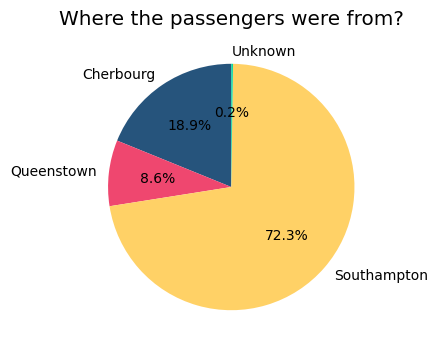

In [59]:
plt.figure(figsize=(15,4))

y = embarked_df["Number of passengers"]
mylabels = embarked_df["City"]
mycolors = ["#26547c", "#ef476f", "#ffd166",'#06d6a0']

plt.pie(y, labels = mylabels, startangle = 90, colors = mycolors,autopct='%1.1f%%')
#plt.legend()
plt.title('Where the passengers were from?')

plt.show()

In [ ]:
##world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
##world.head()
##
##ax = world[(world.name == "United Kingdom")].plot(
##color='white', edgecolor='black')
##
### then plot the geodataframe on this
##world.plot(ax=ax, color='red')
##plt.show()

